<a href="https://colab.research.google.com/github/s-samadmasud/Handwriting-Recognition/blob/main/Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install inference-sdk supervision -q

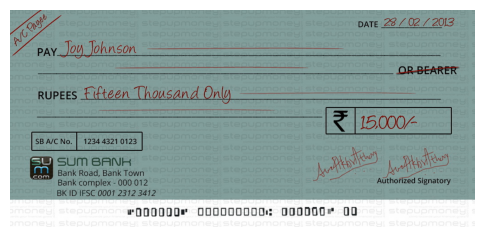

In [18]:
from skimage import io
import numpy as np
import supervision as sv

# Image Link
IMAGE_PATH = "/content/cheque.jpg"

# Get Image
image = io.imread(IMAGE_PATH)

# Display Image
sv.plot_image(image, (6,6))

In [22]:
# Run Prediction
from inference_sdk import InferenceHTTPClient
from google.colab import userdata

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=userdata.get('ROBOFLOW_API_KEY')
)

result = CLIENT.infer(image, model_id="chequemodel/1")

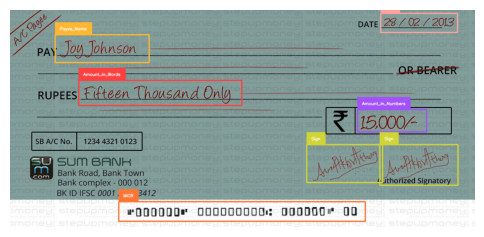

In [23]:
# Visualize Prediction
detections = sv.Detections.from_inference(result)

annotated_image = sv.BoundingBoxAnnotator().annotate(image.copy(),detections)
annotated_image = sv.LabelAnnotator(text_scale=0.3).annotate(annotated_image,detections)

sv.plot_image(annotated_image, (6,6))

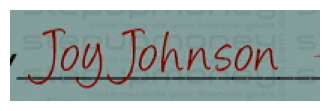

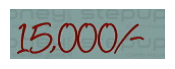

In [13]:
# Crop images
class_list = detections.data["class_name"]
name_detection = detections[class_list == "Payee_Name"]
name_image = sv.crop_image(image,name_detection.xyxy[0].tolist())

amount_detection = detections[class_list == "Amount_In_Numbers"]
amount_image = sv.crop_image(image,amount_detection.xyxy[0].tolist())

sv.plot_image(name_image,(4,4))
sv.plot_image(amount_image,(2,2))

In [14]:
# Set up TrOCR
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

def run_trocr(image):
  processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
  model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')
  pixel_values = processor(images=image, return_tensors="pt").pixel_values

  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text

In [15]:
# Run OCR
name_text = run_trocr(name_image)
amount_text = run_trocr(amount_image)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
print("Name:",name_text)
print("Amount:",amount_text)

Name: Joy Johnson.
Amount: 15,000-
